#Analise e Tratamento Basico (Triagem) de dados
Analises por Hans. 2015

* 2012 (10sec)
* 2013 (10sec)
* 2014 (10sec ate 1Min seguinte)
* 2015 (1Min)

----

In [2]:
import sys
import numpy as np
import pandas as pd
print(sys.version) # Versao do python - Opcional
print(np.__version__) # VErsao do modulo numpy - Opcional
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import time

3.4.2 (default, Oct  8 2014, 13:08:17) 
[GCC 4.9.1]
1.9.2


In [10]:
#?pd.date_range
#rng = pd.date_range('1/1/2011', periods=90, freq='10mS')
#rng

In [3]:
# Carregando dados no dataframe df_dados a partir do arquivo .csv em servidor remoto.
#df_dados = pd.read_csv('http://fortran-zrhans.c9.io/csdapy/sr311-2014.csv', index_col=None)

#Dados local
#df_dados = pd.read_csv('../dados/sr311-2011.csv', index_col=None,parse_dates=['Timestamp'])
df_dados = pd.read_csv('sr311-2011.csv', index_col=None,parse_dates=['Timestamp'])


print("Dados Importados OK")

Dados Importados OK


In [4]:
#Verificanco o nome das colunas
df_dados.columns.tolist()


['Unnamed: 0',
 'Timestamp',
 'Rain_mm',
 'AirTCmin',
 'WS_msmin',
 'AirTCmax',
 'WS_msmax',
 'AirTCsd',
 'WS_mssd',
 'BP_mbar',
 'T108_C',
 'RH',
 'AirTC',
 'SlrW',
 'WindDirs',
 'WS_msa',
 'WindDir_SD1_WVT',
 'WindDir_D1_WVT',
 'WS_ms_S_WVT',
 'PanelTemperature',
 'Status',
 'Battery']

In [6]:
df_dados.head(3)

,Unnamed: 0,Timestamp,Rain_mm,AirTCmin,WS_msmin,AirTCmax,WS_msmax,AirTCsd,WS_mssd,BP_mbar,...,AirTC,SlrW,WindDirs,WS_msa,WindDir_SD1_WVT,WindDir_D1_WVT,WS_ms_S_WVT,PanelTemperature,Status,Battery
0,0,2011-12-01 15:15:00,0,19.09,5.45,19.23,7.7,0.044,0.675,953,...,19.17,893,63.72,6.725,6.472,63.01,6.725,23.04,0,13.89
1,1,2011-12-01 15:15:10,0,19.09,3.95,19.26,6.2,0.052,0.654,953,...,19.16,892,70.01,5.300,4.752,73.68,5.300,23.09,0,13.86
2,2,2011-12-01 15:15:20,0,19.13,4.70,19.26,6.2,0.043,0.654,953,...,19.17,889,78.31,5.300,6.596,79.16,5.300,23.15,0,13.91


In [7]:
#removendo a primeira coluna, e ajustando a coluna Timestamp para ser o indice
del(df_dados['Unnamed: 0'])
df_dados.set_index('Timestamp', inplace=True)

In [8]:
# Selecionando apenas algumas colunas de interesse
df_dados = df_dados[['AirTC', 'RH', 'Rain_mm']]


In [11]:
#df_dados = df_dados.dropna()
df_dados.head()

#s_chuva = df_dados.Rain_mm

,AirTC,RH,Rain_mm
Timestamp,,,
2011-12-01 15:15:00,19.17,34.59,0
2011-12-01 15:15:10,19.16,34.18,0
2011-12-01 15:15:20,19.17,35.65,0
2011-12-01 15:15:30,19.14,34.93,0
2011-12-01 15:15:40,19.14,36.30,0


In [73]:
#s_chuva.cumsum()

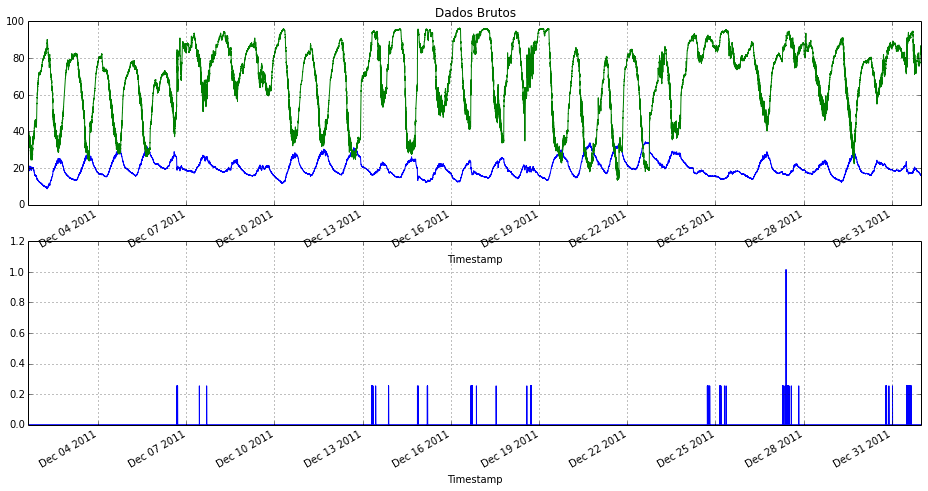

In [9]:
plt.figure(figsize=(16,8))

plt.subplot(2, 1, 1)
plt.title("Dados Brutos")
df_dados.AirTC.plot()
df_dados.RH.plot()

plt.subplot(2, 1, 2)
df_dados.Rain_mm.plot()
#plt.savefig('figs/nome-da-figura.png')

## Ajustando o dominio temporal da serie de dados
----

In [18]:
#df_dados.index.min(), df_dados.index.max(), 
## (Timestamp('2015-01-01 00:00:00'), Timestamp('2015-05-29 10:00:00'))

# Criando um novo dominio continuo com base no inicio e fim da serie de dados original
#d = pd.DataFrame(index=pd.date_range(pd.datetime(2015,1,1), pd.datetime(2015,5,29), freq='Min'))
d = pd.DataFrame(index=pd.date_range(pd.datetime(2011,1,1), pd.datetime(2011,12,31,23,59,00), freq='Min'))
 
print("Indice 2011 criado OK")
d.head(2),d.tail(2)

Indice 2011 criado OK


(Empty DataFrame
 Columns: []
 Index: [2011-01-01 00:00:00, 2011-01-01 00:01:00], Empty DataFrame
 Columns: []
 Index: [2011-12-31 23:58:00, 2011-12-31 23:59:00])

In [19]:
# Unindo os dois DataFrames pela esquerda (o que não houver em d será substituído por NaN
ndf_dados = d.join(df_dados)
#ndf_dados.fillna(0) #Substitui valor NaN por 0
print("Junçao OK")

Junçao OK


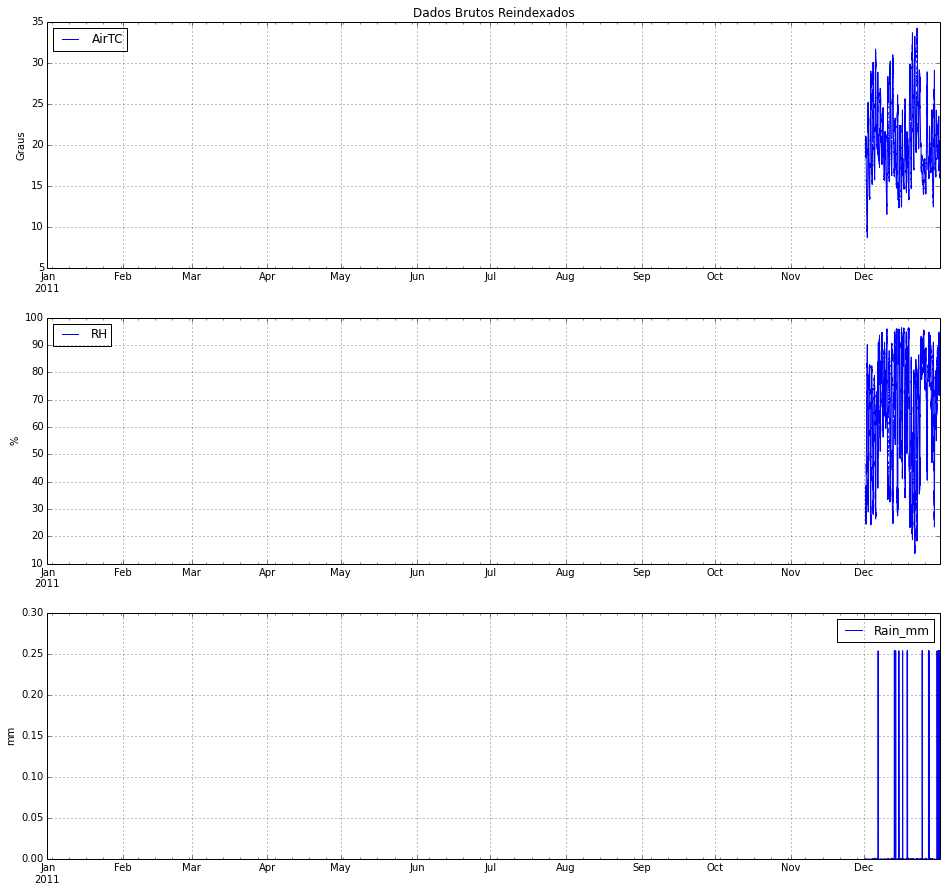

In [20]:
plt.figure(figsize=(16,15))

#Grafico Temperatura
plt.subplot(3, 1, 1)
plt.title('Dados Brutos Reindexados')
plt.ylabel('Graus')
plt.xlabel('')
ndf_dados.AirTC.plot(legend=True)

#Grafico Umidade
plt.subplot(3, 1, 2)
#plt.title('Dados Brutos Reindexados')
plt.xlabel('')
plt.ylabel('%')
ndf_dados.RH.plot(legend=True)

#Grafico Chuva
plt.subplot(3, 1, 3)
#plt.title('Dados Brutos Reindexados')
plt.xlabel('')
plt.ylabel('mm')
ndf_dados.Rain_mm.plot(legend=True)

#plt.savefig('figs/nome-da-figura.png')

## Em busca dos GAPs

In [21]:
#numpy.all(numpy.isnan(data_list))
# np.any(np.isnan(ndf_dados))   Se returnar True eh porque algum valor NaN foi encontrado

# Mostra onde os dados Possuem valor NaN
ndf_dados[np.isnan(ndf_dados.Rain_mm)]
 

,AirTC,RH,Rain_mm
2011-01-01 00:00:00,NaN,NaN,NaN
2011-01-01 00:01:00,NaN,NaN,NaN
2011-01-01 00:02:00,NaN,NaN,NaN
2011-01-01 00:03:00,NaN,NaN,NaN
2011-01-01 00:04:00,NaN,NaN,NaN
2011-01-01 00:05:00,NaN,NaN,NaN
2011-01-01 00:06:00,NaN,NaN,NaN
2011-01-01 00:07:00,NaN,NaN,NaN
2011-01-01 00:08:00,NaN,NaN,NaN
2011-01-01 00:09:00,NaN,NaN,NaN


In [85]:
ndf_dados.head()
#Exportando para um novo arquivo
ndf_dados.to_csv('sao_roque_2015-AirTC-RH-Rain.csv')
# TODO: Este arquivo nao possui mais gaps no dominio temporal (as imagens foram ajustadas para o valor NaN), portanto pode-se pular a etapa reindexar caso seja utilizado no futuro.

###Analises Diarias

In [86]:
df_dados_diarios = ndf_dados[['AirTC','RH']] .resample('D', how='mean')
chuva = ndf_dados.Rain_mm.resample('D', how='sum')


In [87]:
df_dados_diarios['Acum_Chuva'] = chuva
df_dados_diarios.head()

,AirTC,RH,Acum_Chuva
2015-01-01,20.660417,82.342326,11.176
2015-01-02,18.120118,87.190590,1.778
2015-01-03,18.737708,79.551458,0.000
2015-01-04,21.458375,67.746931,0.000
2015-01-05,23.430160,66.851417,0.000


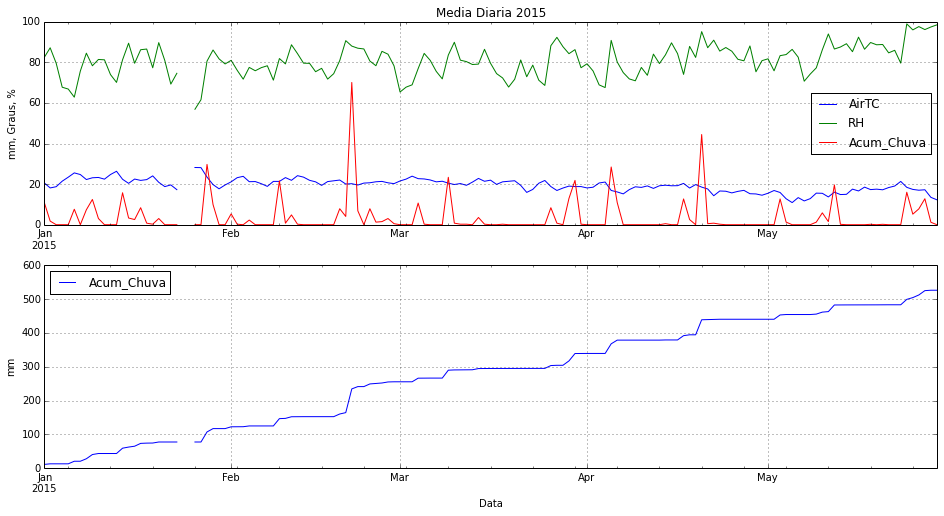

In [111]:
#Mostrando tudo
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.title('Media Diaria 2015')
plt.xlabel("")
plt.ylabel("mm, Graus, %")
df_dados_diarios.AirTC.plot(legend=True)
df_dados_diarios.RH.plot(legend=True)
df_dados_diarios.Acum_Chuva.plot(legend=True)

plt.subplot(2,1,2)
acumulado = df_dados_diarios.Acum_Chuva.cumsum()
plt.xlabel("Data")
plt.ylabel("mm")
acumulado.plot(legend=True)

#plt.savefig('figs/nome-da-figura.png')

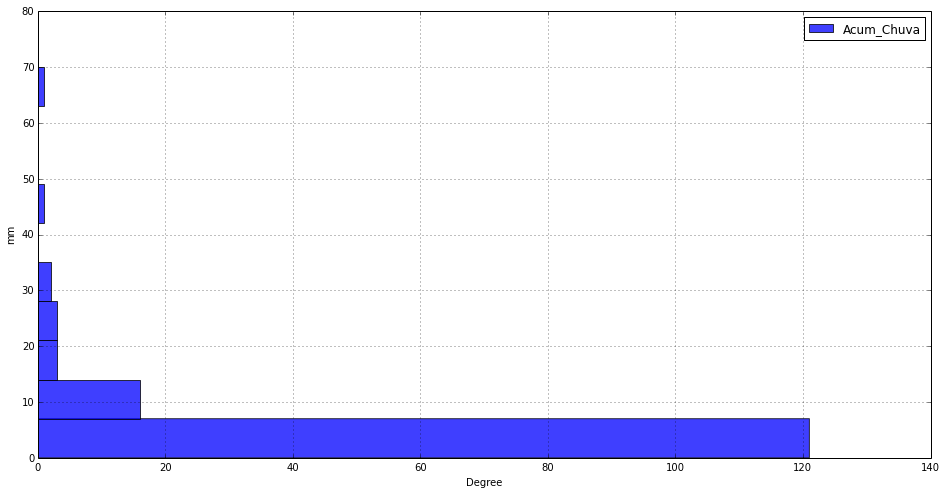

In [112]:
# Histograma do Acumulado Diario
plt.figure(figsize=(16,8))
plt.xlabel("Acorrencia")
plt.ylabel("mm")
df_dados_diarios.Acum_Chuva.plot(kind='hist', orientation='horizontal', alpha=.75,legend=True)

#plt.savefig('figs/nome-da-figura.png')

### Quais dias o Acumulado de chuva foi superior a 20mm em 2015 ?

In [112]:
# Quais dias o Acumulado de chuva foi superior a 20mm em 2015?
df_dados_diarios.Acum_Chuva[df_dados_diarios.Acum_Chuva > 20.]

Timestamp
2015-01-28    29.718
2015-02-09    21.590
2015-02-21    70.104
2015-03-09    23.368
2015-03-30    21.844
2015-04-05    28.448
2015-04-20    44.450
Name: Acum_Chuva, dtype: float64

### Quantos dias o Acumulado de chuva foi superior a 20mm em 2015 ?

In [129]:
# Quantos dias o Acumulado de chuva foi superior a 20mm em 2015?
df_dados_diarios.Acum_Chuva[df_dados_diarios.Acum_Chuva > 20.].count()

7

### Estatistica geral do DataFrame

In [110]:
ndf_dados.describe(), df_dados_diarios.describe()

(               AirTC             RH        Rain_mm
 count  204513.000000  204513.000000  204513.000000
 mean       19.453614      80.962955       0.002573
 std         4.293105      14.318227       0.039800
 min         7.030000       0.000000       0.000000
 25%        16.570000      71.560000       0.000000
 50%        19.280000      83.900000       0.000000
 75%        22.250000      92.600000       0.000000
 max        32.080000     100.000000       5.800000,
             AirTC          RH  Acum_Chuva
 count  147.000000  147.000000  147.000000
 mean    19.477713   80.830773    3.579878
 std      3.160460    7.848394    8.697315
 min     10.897843   56.890602    0.000000
 25%     17.346858   75.739872    0.000000
 50%     19.605347   80.935653    0.000000
 75%     21.442038   86.432545    2.794000
 max     28.191128   98.972410   70.104000)

---
# Atividade
## Refazer os procedimentos para os anos de 2012 ate 2014.

* Dados disponiveis em http://fortran-zrhans.c9.io/csdapy/
* Aplicar os tratamentos e mostrar tambem os graficos para temperatura maxima, minima, velocidade do vento e radiacao solar.

---

## Resultados apos executar os procedimentos para cada ano a partir de 2012.
----

```bash

hans@hasus:~/Dropbox/workspace/spyder/spyderprj01$ python3 ATMOS-Anuais.py -i 2012; python3 ATMOS-Anuais.py -i 201
3.4.3 |Anaconda 2.2.0 (64-bit)| (default, Mar  6 2015, 12:03:53) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
1.9.2
Analisando ano 2012
Dados 2012 Importados OK
Gerando Graficos Brutos - 2012
Indice criado OK
Junção OK
Gerando Graficos Brutos Reindexados - 2012
Gerando Graficos Media Diaria - 2012
Gerando Graficos Acumulado de Chuva - 2012
Gerando Graficos Histograma Acumulado diario de Chuva - 2012
2012-01-01    41.402
2012-01-13    24.638
2012-02-05    45.466
2012-06-17    30.480
2012-07-06    62.992
2012-07-24    37.592
2012-08-26    28.956
2012-09-09    20.320
2012-09-10    52.578
2012-09-16    31.242
2012-09-18    35.814
2012-09-19    27.432
2012-10-07    20.320
2012-10-22    24.638
2012-11-23    26.924
2012-12-27    43.180
2012-12-28    29.972
Name: Acum_Chuva, dtype: float64
17

________
FINALIZADO!!
________
3.4.3 |Anaconda 2.2.0 (64-bit)| (default, Mar  6 2015, 12:03:53) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
1.9.2
Analisando ano 2013
Dados 2013 Importados OK
Gerando Graficos Brutos - 2013
Indice criado OK
Junção OK
Gerando Graficos Brutos Reindexados - 2013
Gerando Graficos Media Diaria - 2013
Gerando Graficos Acumulado de Chuva - 2013
Gerando Graficos Histograma Acumulado diario de Chuva - 2013
2013-02-25    29.718
2013-03-09    22.352
2013-03-12    44.958
2013-03-20    34.798
2013-04-04    25.908
2013-04-12    26.924
2013-05-19    41.402
2013-05-29    20.828
2013-06-01    20.828
2013-06-28    24.638
2013-06-29    20.828
2013-07-07    27.178
2013-08-09    28.702
2013-08-13    22.860
2013-08-23    25.654
2013-08-24    61.722
2013-08-25    34.036
2013-08-26    22.860
2013-09-20    51.816
2013-09-21    44.704
2013-10-21    27.940
2013-11-11    53.340
2013-11-15    20.320
2013-11-20    23.368
2013-11-21    20.828
2013-12-05    22.098
Name: Acum_Chuva, dtype: float64
26

________
FINALIZADO!!
________

3.4.3 |Anaconda 2.2.0 (64-bit)| (default, Mar  6 2015, 12:03:53) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
1.9.2
Analisando ano 2014
Dados 2014 Importados OK
Gerando Graficos Brutos - 2014
Indice criado OK
Junção OK
Gerando Graficos Brutos Reindexados - 2014
Gerando Graficos Media Diaria - 2014
Gerando Graficos Acumulado de Chuva - 2014
Gerando Graficos Histograma Acumulado diario de Chuva - 2014
2014-01-03    23.622
2014-01-10    21.844
2014-02-12    20.574
2014-02-25    22.352
2014-03-17    22.352
2014-03-31    24.130
2014-04-08    49.784
2014-04-11    44.196
2014-05-21    37.338
2014-05-31    37.846
2014-06-05    53.594
2014-06-13    37.084
2014-06-24    25.908
2014-06-26    30.226
2014-07-03    23.876
2014-07-23    34.798
2014-08-31    25.146
2014-09-02    25.654
2014-09-06    29.972
2014-09-11    27.686
2014-09-26    25.146
2014-10-13    37.338
2014-10-17    46.990
2014-10-19    23.368
2014-12-12    44.704
2014-12-20    33.274
2014-12-21    35.306
2014-12-27    30.226
Name: Acum_Chuva, dtype: float64
28

________
FINALIZADO!!
________

3.4.3 |Anaconda 2.2.0 (64-bit)| (default, Mar  6 2015, 12:03:53) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
1.9.2
Analisando ano 2015
Dados 2015 Importados OK
Gerando Graficos Brutos - 2015
Indice criado OK
Junção OK
Gerando Graficos Brutos Reindexados - 2015
Gerando Graficos Media Diaria - 2015
Gerando Graficos Acumulado de Chuva - 2015
Gerando Graficos Histograma Acumulado diario de Chuva - 2015
2015-01-28    29.718
2015-02-09    21.590
2015-02-21    70.104
2015-03-09    23.368
2015-03-30    21.844
2015-04-05    28.448
2015-04-20    44.450
Name: Acum_Chuva, dtype: float64
7

________
FINALIZADO!!
________


```

----
Elaborado por Hans Rogerio Zimermann para o curso *FSC878 - Topicos Especiais II* PPGMET - UFSM.